# Multidimensional differential equations

- Börge Göbel 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Heat equation

We solve the differential equations:

\\( 
\frac{\partial}{\partial t} u(\vec{r},t) = a \Delta u(\vec{r},t)
\\)

## In one dimension:

\\( 
\frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t)
\\)

Here, \\( u(x,t) \\) is an array \\(\{ u_1, u_2, \dots, u_n \} \\) that has different values for different times. It describes the temperature. We can discretize the spatial derivative according to:

\\( 
\frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2}
\\)

For the edges we use double-forward or double-backward methods:

\\( 
\frac{\partial^2}{\partial x^2} u_1 = \frac{u_{1}-2u_{2}+u_{3}}{(\Delta x)^2}\\
\frac{\partial^2}{\partial x^2} u_n = \frac{u_{n}-2u_{n-1}+u_{n-2}}{(\Delta x)^2}
\\)

We can rewrite the heat equation as a set of coupled equation:

\begin{align}
\frac{\partial}{\partial t}u_1&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_2&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_3&=\frac{a}{(\Delta x)^2}\left(u_2-2u_3+u_4\right)\\ 
\vdots\\ 
\frac{\partial}{\partial t}u_j&=\frac{a}{(\Delta x)^2}\left(u_{j-1}-2u_j+u_{j+1}\right)\\ 
\vdots\\
\frac{\partial}{\partial t}u_{n-2}&=\frac{a}{(\Delta x)^2}\left(u_{n-3}-2u_{n-2}+u_{n-1}\right)\\
\frac{\partial}{\partial t}u_{n-1}&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)\\
\frac{\partial}{\partial t}u_n&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)
\end{align}

Alternatively, we can also keep the temperature at the edges constant and consider these to be (part of) the constant heat bath:

$ u_1 = \mathrm{const.}$
$ u_n = \mathrm{const.} $


In [17]:
#Testing 
u = np.array([1, 4, 9, 16, 25])
u_new = np.zeros(5)
u_new[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]

In [18]:
u_new

array([0., 2., 2., 2., 0.])

In [19]:
a = 1.0
dx = 1.0

def f_1D(t, u):
    u_new = np.zeros(len(u))
    u_new[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]
    return u_new * a/dx**2

In [25]:
tStart = 0.0
tEnd = 5000

size = 100
u0 = np.zeros([size])
u0[0] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method="RK45", t_eval=np.linspace(tStart, tEnd, 10001))

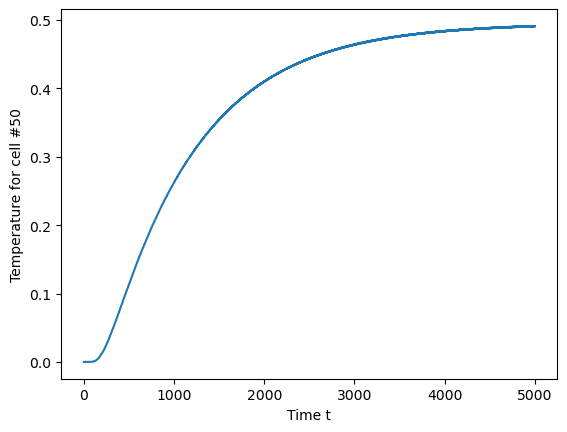

In [26]:
index = size//2

plt.xlabel("Time t")
plt.ylabel("Temperature for cell #"+str(index))

plt.plot(solution.t, solution.y[size//2])

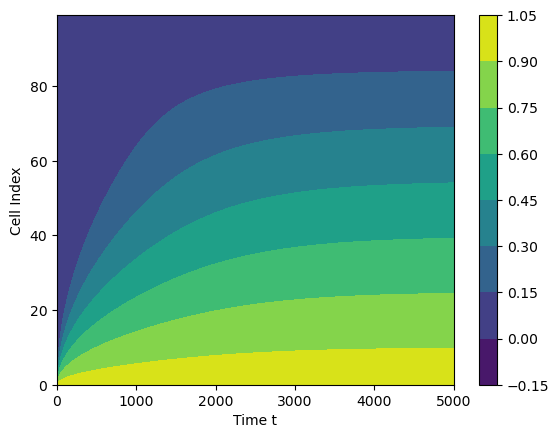

In [28]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel("Time t")
plt.ylabel("Cell Index")

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

### Different starting parameters

In [35]:
tStart = 0.0
tEnd = 2000

size = 100
u0 = np.zeros([size])
u0[0] = 1
u0[-1] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method="RK45", t_eval=np.linspace(tStart, tEnd, 10001))

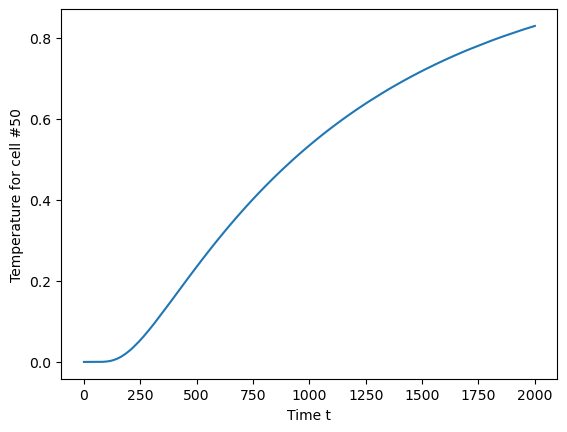

In [36]:
index = size//2

plt.xlabel("Time t")
plt.ylabel("Temperature for cell #"+str(index))

plt.plot(solution.t, solution.y[size//2])

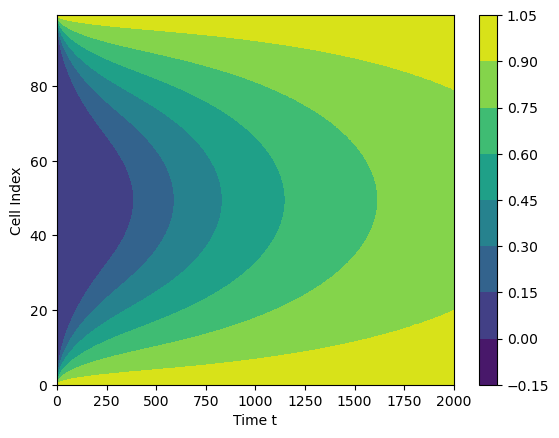

In [37]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel("Time t")
plt.ylabel("Cell Index")

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

## In 2 dimensions

\\( 
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right)
\\)

Here, \\( u(\vec{r},t) \\) is an array \\(\{ u_{1,1}, u_{1,2}, \dots, u_{n,n} \} \\) that has different values for different times. We can discretize the spatial derivative according to:

\\( 
\frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}
\\)

In [62]:
a = 1.0
dx = 1.0
dy = 1.0

def f_2D(t, u):
    u_new = np.zeros([len(u), len(u)])
    u_new[1:-1, 1:-1] = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) * a/dx**2 + (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) * a/dy**2
    return u_new

sizex = 100
sizey = 100

def f_2D_flattened(t, u):
    u = u.reshape(sizex, sizey)
    u_new = np.zeros([sizex, sizey])
    u_new[1:-1, 1:-1] = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) * a/dx**2 + (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) * a/dy**2
    return u_new.flatten()

In [63]:
f_2D(1, np.array([[1, 2, 3, 3], [4, 5, 6, 6], [7, 8, 9, 9], [7, 8, 8, 9]]))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0., -3., -5.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [64]:
tStart = 0.0
tEnd = 5000

size = 100
u0 = np.zeros([size, size])
u0[0, :] = 1
u0[:, 0] = 1

solution = integrate.solve_ivp(f_2D_flattened, [tStart, tEnd], u0.flatten(), method="RK45", t_eval=np.linspace(tStart, tEnd, 10001))

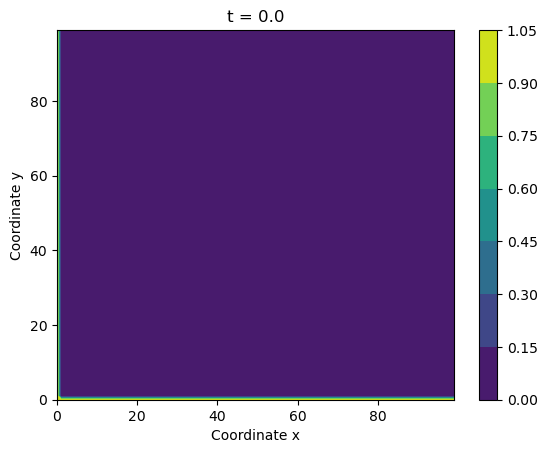

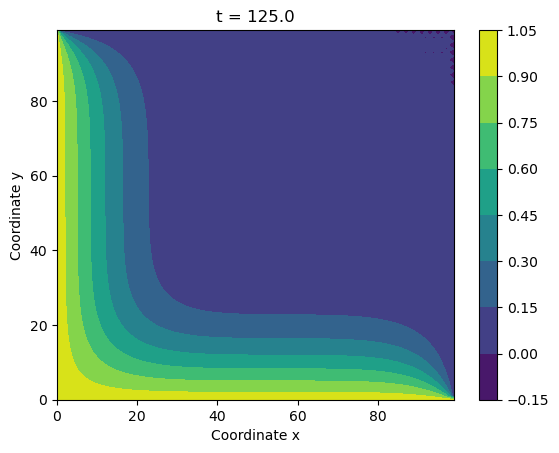

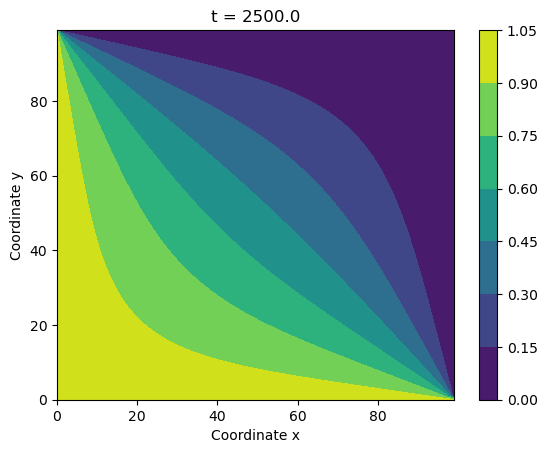

In [65]:
x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))

tIndex = 0 #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()

tIndex = tEnd//20 #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()

tIndex = tEnd #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()

### Different starting conditions

In [77]:
tStart = 0.0
tEnd = 10000

size = 100
u0 = np.zeros([size, size])
u0[0, :] = 1
u0[:, 0] = 1
u0[-1, :] = 1
u0[:, -1] = 1

solution = integrate.solve_ivp(f_2D_flattened, [tStart, tEnd], u0.flatten(), method="RK45", t_eval=np.linspace(tStart, tEnd, 10001))

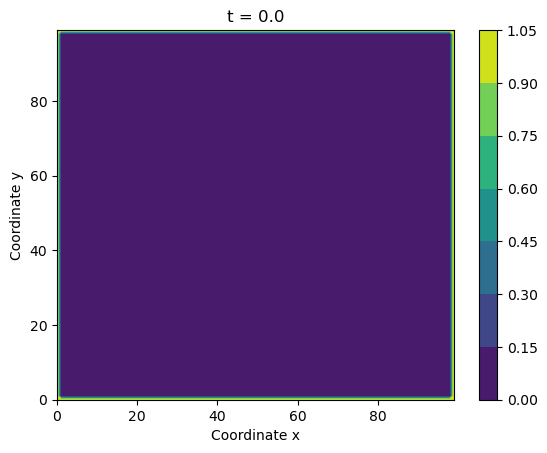

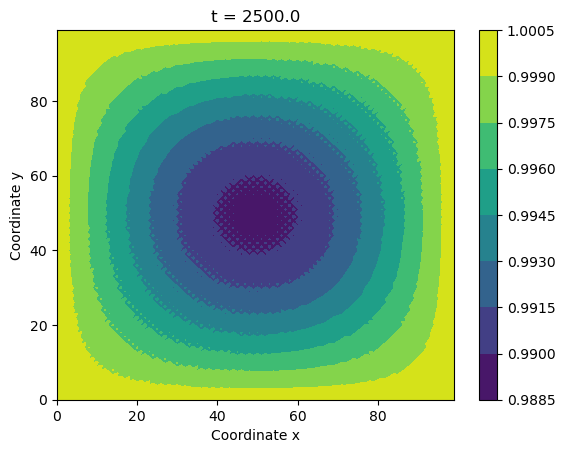

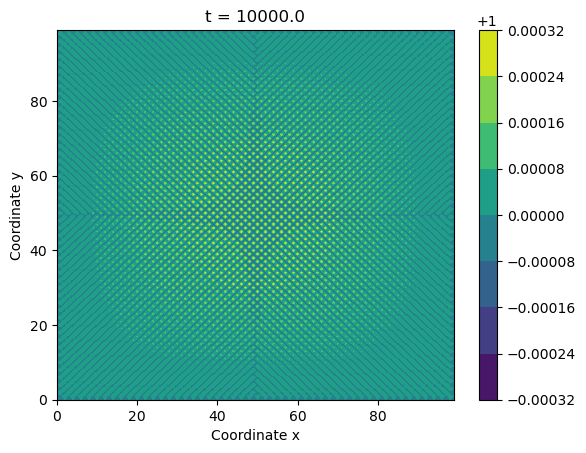

In [84]:
x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))

tIndex = 0 #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()

tIndex = tEnd//4 #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()

tIndex = tEnd #we see temperature distribution at tIndex constant time

plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.title("t = "+str(solution.t[tIndex]))
plt.show()